In [3]:
import transformers
import torch

/export/scratch2/home/mae/.local/lib/python3.12/site-packages/transformers/models/auto/tokenization_auto.py:810: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/export/scratch2/home/mae/.local/lib/python3.12/site-packages/transformers/models/auto/configuration_auto.py:1006: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(
/export/scratch2/home/mae/.local/lib/python3.12/site-packages/transformers/models/auto/auto_factory.py:471: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers. Please use `token` instead.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:08<00:00,  8.15s/it]


  0%|          | 0/1 [00:00<?, ?it/s]

0 - Paris is my favourite pizza for breakfast.
1 - Paris is the capital of France.
2 - Paris is the capital of the world.
3 - Paris is the capital of Italy.
4 - The cat is on the mat
5 - The cat is on the hat
6 - The cat is on the pizza
7 - The pizza is on the mat
8 - I told you that the cat is on the mat
9 - I told you the cat is on the mat
10 - The cat sat on the mat.
11 - Artificial intelligence is transforming the world.
12 - This sentence is completely random and meaningless.
13 - NLP models can generate human-like text.


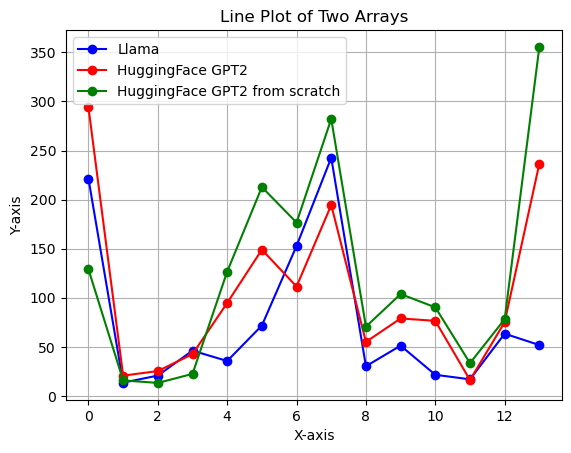

In [ ]:
predictions = [
    "Paris is my favourite pizza for breakfast.",
    "Paris is the capital of France.",
    "Paris is the capital of the world.",
    "Paris is the capital of Italy.",
    "The cat is on the mat",
    "The cat is on the hat",
    "The cat is on the pizza",
    "The pizza is on the mat",
    "I told you that the cat is on the mat",
    "I told you the cat is on the mat",
    "The cat sat on the mat.",
    "Artificial intelligence is transforming the world.",
    "This sentence is completely random and meaningless.",
    "NLP models can generate human-like text.",
]


import lmppl
#https://github.com/asahi417/lmppl

scorer = lmppl.LM('meta-llama/Meta-Llama-3-8B', use_auth_token= True)
ppl = scorer.get_perplexity(predictions)

from evaluate import load 
#https://huggingface.co/spaces/evaluate-metric/perplexity
#https://huggingface.co/docs/transformers/perplexity

perplexity = load("perplexity", module_type="metric")
perplexity = perplexity.compute(predictions=predictions, model_id='gpt2')
results = perplexity['perplexities']

import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
#https://huggingface.co/docs/transformers/en/perplexity?utm_source=chatgpt.com

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"  # You can use 'gpt2-medium', 'gpt2-large', etc.
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': '[PAD]'})
model = GPT2LMHeadModel.from_pretrained(model_name)
model.eval()  # Set the model to evaluation mode

def calculate_perplexity(sentence):
    # Tokenize input text and add special tokens
    inputs = tokenizer(sentence, return_tensors="pt", truncation=True, padding=True)
    input_ids = inputs["input_ids"]

    # Calculate loss
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss  # Cross-entropy loss

    # Calculate perplexity
    perplexity = torch.exp(loss).item()
    return perplexity

# Evaluate perplexity for each sentence
perplexity_score = [calculate_perplexity(sentence) for sentence in predictions]

import matplotlib.pyplot as plt

# Sample data
for idx, sent in enumerate(predictions):
    print(f"{idx} - {sent}")
x = [i for i in range(len(predictions))]
y1 = ppl
y2 = results
y3 = perplexity_score

# Create line plot
plt.plot(x, y1, label='Llama', color='blue', marker='o')
plt.plot(x, y2, label='HuggingFace GPT2', color='red', marker='o')
plt.plot(x, y3, label='HuggingFace GPT2 from scratch', color='green', marker='o')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot of Two Arrays')

# Show legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()